In [1]:
from PIL import Image
import os

def extract_and_save_images(image_path, output_directory, num_rows=5, num_cols=10):
    # Create the output directory or clear its contents if it exists
    if os.path.exists(output_directory):
        for file in os.listdir(output_directory): #os.listdir() function in Python is used to obtain a list of filenames in a specified directory. 
            file_path = os.path.join(output_directory, file)
            if os.path.isfile(file_path):
                os.remove(file_path)
    else:
        os.makedirs(output_directory)
#If the directory already exists, it will not raise an error, but if any part of the path already exists as a file, it will raise an OSError.               

    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Calculate the width and height of each extracted image
    width, height = img.size
    image_width = width // num_cols
    image_height = height // num_rows

    # Extract and save each image separately
    count = 1
    for i in range(num_rows):
        for j in range(num_cols):
            left = j * image_width
            top = i * image_height
            right = left + image_width
            bottom = top + image_height

            # Extract the region containing the image content
            extracted_image = img.crop((left, top, right, bottom))

            # Save the extracted image to the appropriate directory
            output_path = os.path.join(output_directory, f'image_{count}.png')
#f'image_{count}.png' is a formatted string using an f-string (formatted string literal). This creates a filename that includes a placeholder {count}            
           
            extracted_image.save(output_path)

            count += 1

# Define paths and directories
directory = '/Users/behnam/python-projects/Neural Network/image_Tumor_brain'
with_tumor_filename = 'with_tumor.png'
without_tumor_filename = 'without_tumor.png'

with_tumor_path = os.path.join(directory, with_tumor_filename)
without_tumor_path = os.path.join(directory, without_tumor_filename)

output_directory_with_tumor = os.path.join(directory, 'extraction_with_tumor')
output_directory_without_tumor = os.path.join(directory, 'extraction_without_tumor')

# Extract and save images to respective directories
extract_and_save_images(with_tumor_path, output_directory_with_tumor)
extract_and_save_images(without_tumor_path, output_directory_without_tumor)

Extracted images from 'with_tumor' directory:


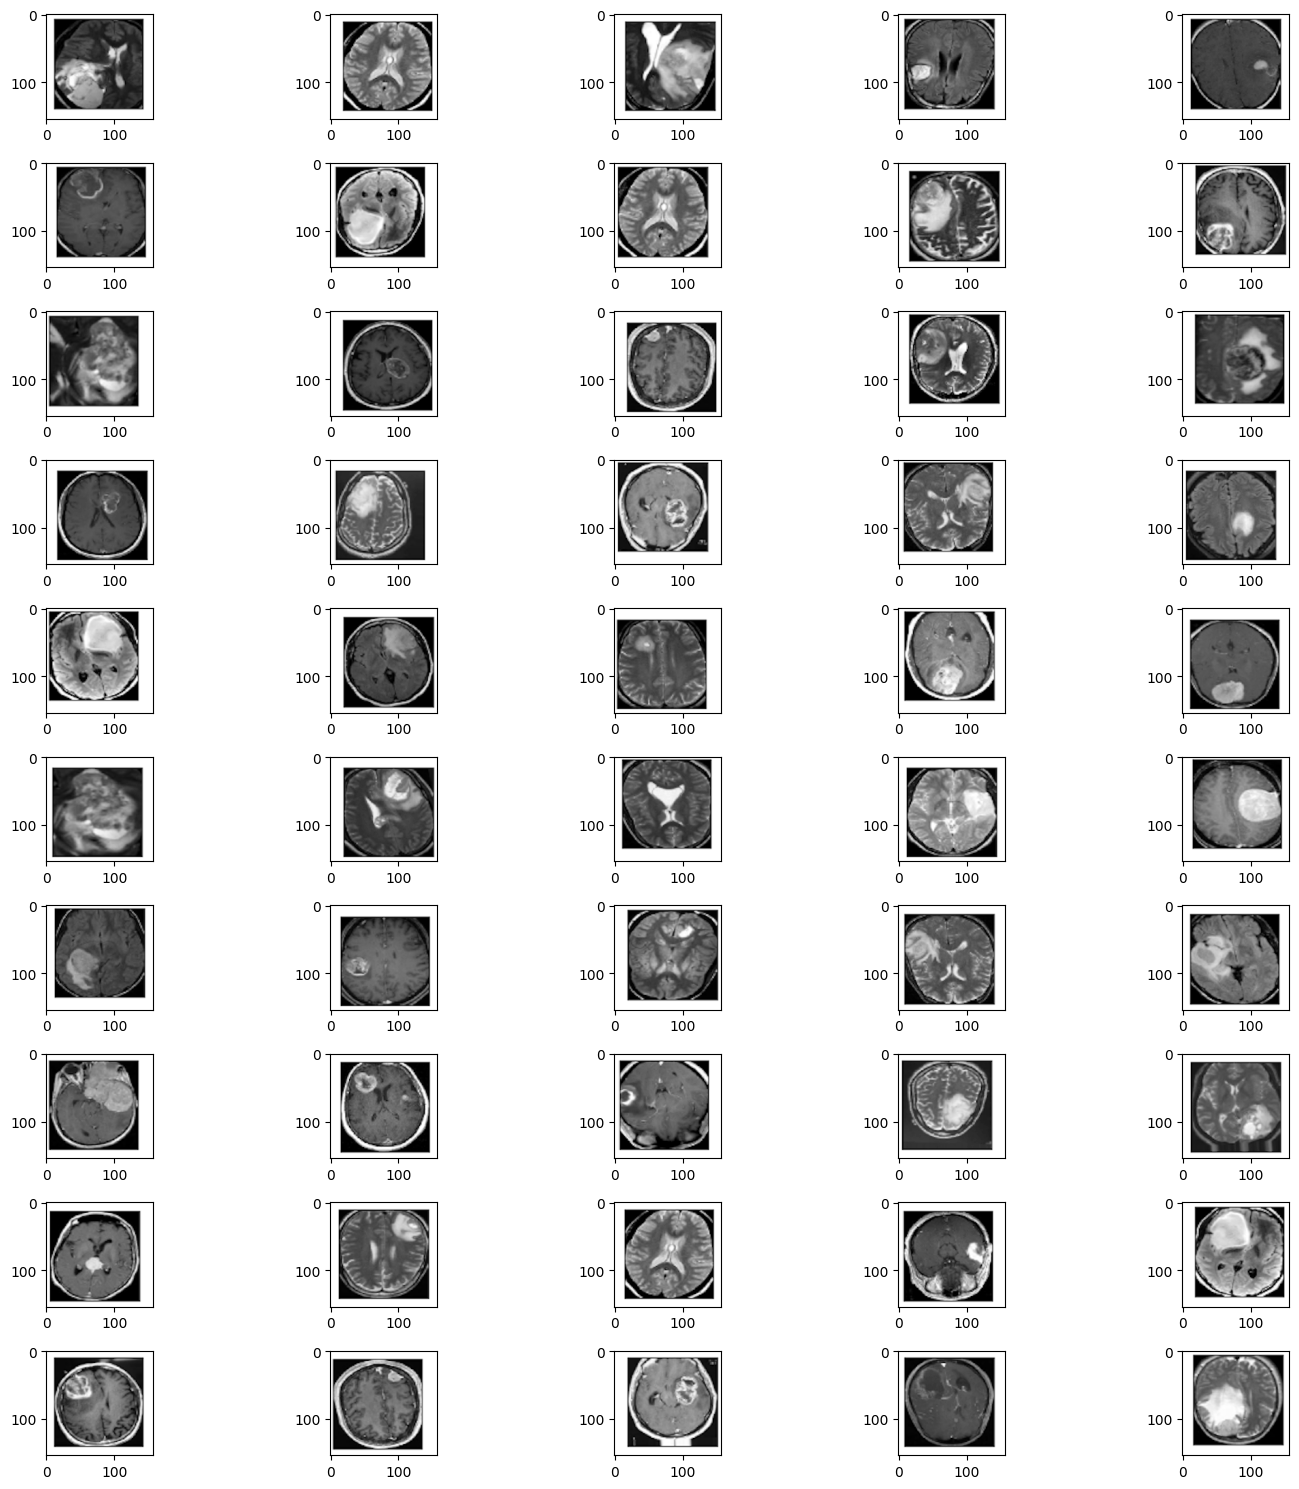

Extracted images from 'without_tumor' directory:


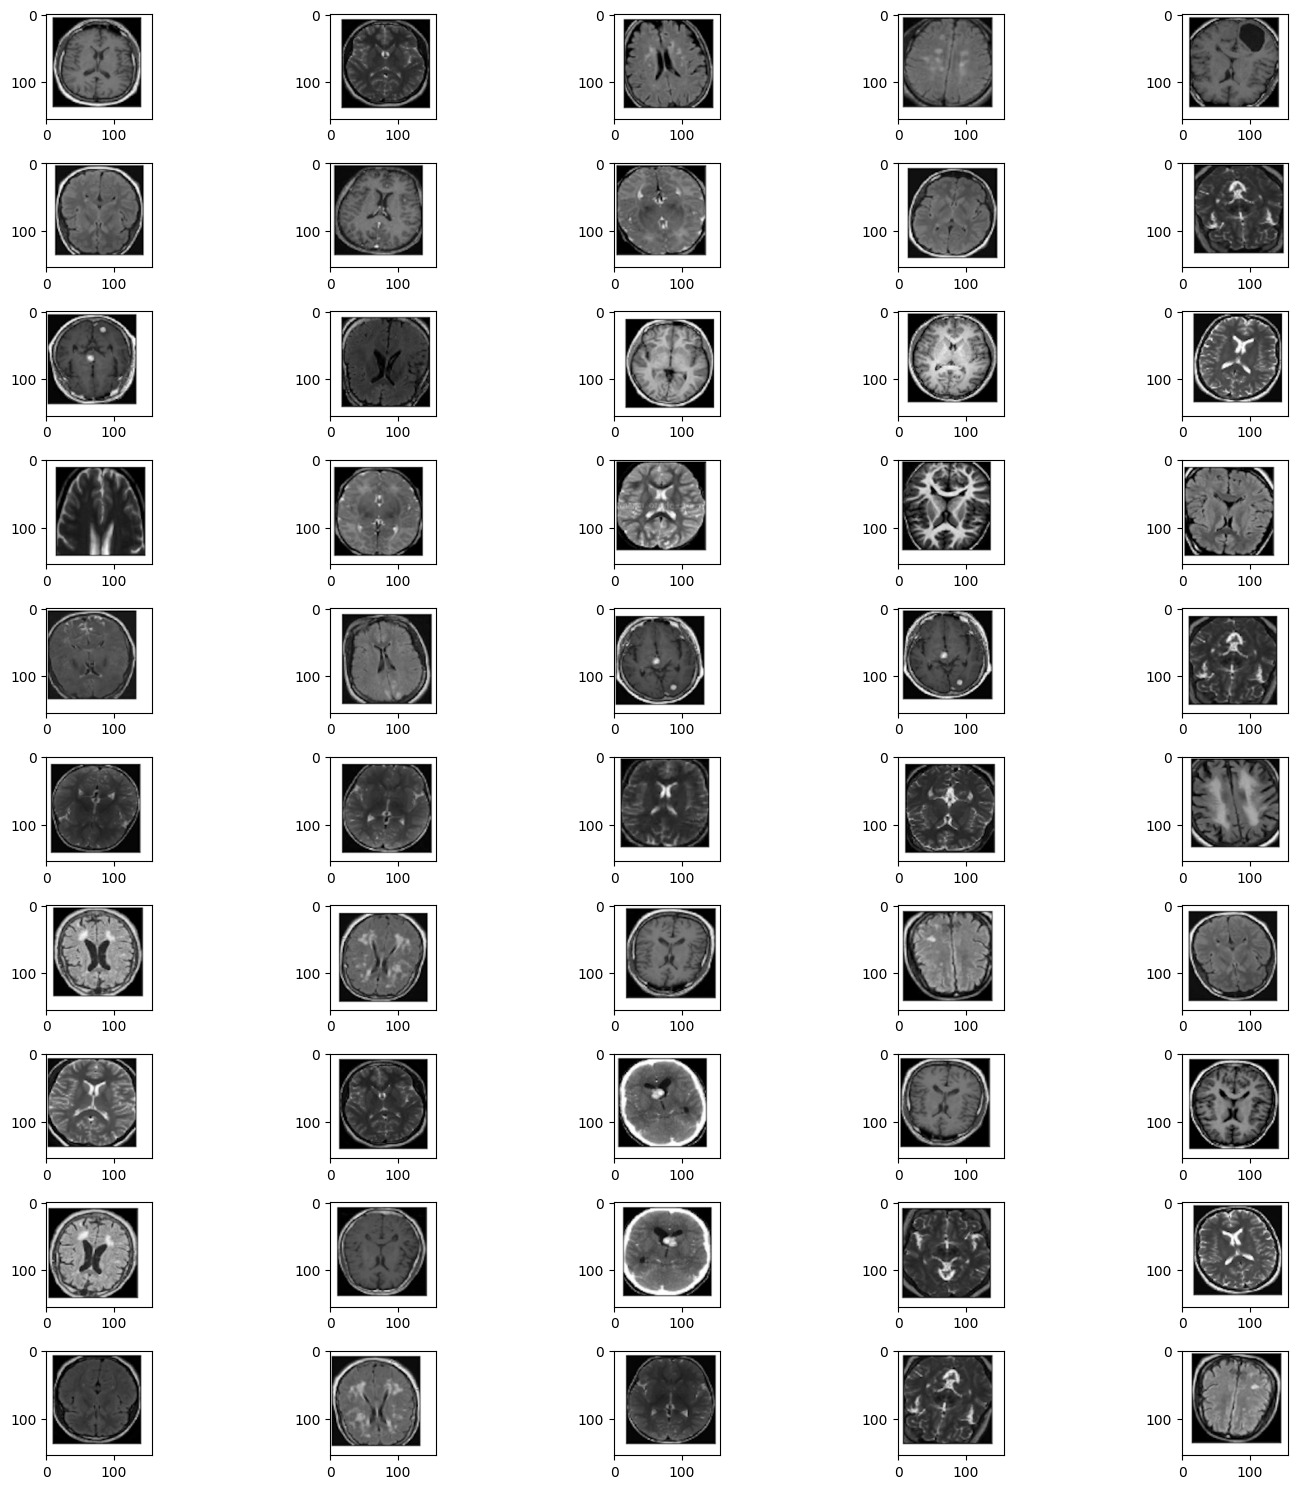

In [2]:
####neural network project
## Image processing and image analysis

from PIL import Image
import os
import matplotlib.pyplot as plt

def display_all_extracted_images(extracted_directory):
    # Get a list of extracted image filenames
    extracted_images = [filename for filename in os.listdir(extracted_directory) if filename.endswith('.png')]

    # Display all extracted images
    num_images = len(extracted_images)
    num_rows = (num_images + 4) // 5  # Display 5 images per row
    fig, axes = plt.subplots(num_rows, 5, figsize=(15, 15)) #subplots(num_rows, num_columns, fig size)
#here axes is a numpy value that has value of (num_rows, num_columns)
    
    for i, image_file in enumerate(extracted_images):
#enumerate(extracted_images) iterates through the extracted_images sequence (presumably a list or another iterable containing image file names or paths).         
#i contains the index of the current item, and image_file contains the actual item itself        
        
        img_path = os.path.join(extracted_directory, image_file)
        img = Image.open(img_path)
        row = i // 5
        col = i % 5  #% is the modulo operator, which returns the remainder of the division of i by 5
        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].axis('on')

    plt.tight_layout()
    plt.show()

# Define the directory containing the extracted images
directory = '/Users/behnam/python-projects/Neural Network/image_Tumor_brain'
extracted_with_tumor_directory = os.path.join(directory, 'extraction_with_tumor')
extracted_without_tumor_directory = os.path.join(directory, 'extraction_without_tumor')

# Display all extracted images from both 'with_tumor' and 'without_tumor' directories
print("Extracted images from 'with_tumor' directory:")
display_all_extracted_images(extracted_with_tumor_directory)

print("Extracted images from 'without_tumor' directory:")
display_all_extracted_images(extracted_without_tumor_directory)

In [3]:
####neural network CNN
#### identations were probelmatic
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten

def load_images(directory):
    images = []
    labels = []

    for img_file in os.listdir(directory):
        img_path = os.path.join(directory, img_file)
        if os.path.isfile(img_path):  
            image = load_img(img_path, color_mode='grayscale', target_size=(256, 256))
            image = img_to_array(image)
            image /= 255.0
            images.append(image)
            labels.append(1 if img_file.startswith('with') else 2 if img_file.startswith('without') else 0)

    return np.array(images), np.array(labels) # returns the two as numpy arra

path_with_tumor = '/Users/behnam/python-projects/Neural Network/image_Tumor_brain/extraction_with_tumor'
path_without_tumor = '/Users/behnam/python-projects/Neural Network/image_Tumor_brain/extraction_without_tumor'

# Load images with tumors
X_with_tumor, y_with_tumor = load_images(path_with_tumor)

# Load images without tumors
X_without_tumor, y_without_tumor = load_images(path_without_tumor)

# Splitting the data into 80% train and 20% test for both with and without tumor categories
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_tumor, y_with_tumor, test_size=0.2, random_state=42)
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without_tumor, y_without_tumor, test_size=0.2, random_state=42)
#ratio of test to train is 0.2 here. y is the output and X is the input

# Combine datasets
X_train = np.concatenate((X_train_with, X_train_without), axis=0)
y_train = np.concatenate((y_train_with, y_train_without), axis=0)

X_test = np.concatenate((X_test_with, X_test_without), axis=0)
y_test = np.concatenate((y_test_with, y_test_without), axis=0)



# Define the neural network architecture
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 1)))  # Assuming input image size is 256x256
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer, binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


2023-12-15 19:27:27.924060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'X_val' is not defined

In [8]:
# Evaluate the model on the test data for both categories separately
#on above we evaluated the whole data together
#here we don't merge the 20% and 80% for evaluation, but just evaluate the 20%
loss_with, accuracy_with = model.evaluate(X_test_with, y_test_with)
print("Accuracy on 'with tumor' images:", accuracy_with)

loss_without, accuracy_without = model.evaluate(X_test_without, y_test_without)
print("Accuracy on 'without tumor' images:", accuracy_without)

1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy on 'with tumor' images: 1.0
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy on 'without tumor' images: 1.0


In [21]:
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import os

# Function to load images and generate labels
def load_images(directory):
    images = []
    labels = []

    for img_file in os.listdir(directory):
        img_path = os.path.join(directory, img_file)
        if os.path.isfile(img_path):  
            image = load_img(img_path, color_mode='grayscale', target_size=(256, 256))
            image = img_to_array(image)
            image /= 255.0
            images.append(image)
            
            # Update label encoding based on the image file names
            if 'with' in img_file:
                labels.append(1)  # Class 1 for 'with' tumor
            elif 'without' in img_file:
                labels.append(0)  # Class 0 for 'without' tumor
            else:
                labels.append(2)  # Class 2 for 'null' (other)

    return np.array(images), np.array(labels)

# Directories for images
path_with_tumor = '/Users/behnam/python-projects/Neural Network/image_Tumor_brain/extraction_with_tumor'
path_without_tumor = '/Users/behnam/python-projects/Neural Network/image_Tumor_brain/extraction_without_tumor'

# Load images with tumors
X_with_tumor, y_with_tumor = load_images(path_with_tumor)

# Load images without tumors
X_without_tumor, y_without_tumor = load_images(path_without_tumor)

# Split the 'with' tumor data into train and test sets
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_tumor, y_with_tumor, test_size=0.2, random_state=42)

# Split the 'without' tumor data into train and test sets
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without_tumor, y_without_tumor, test_size=0.2, random_state=42)

# Combine datasets for training and testing
X_train = np.concatenate((X_train_with, X_train_without), axis=0)
y_train = np.concatenate((y_train_with, y_train_without), axis=0)

X_test = np.concatenate((X_test_with, X_test_without), axis=0)
y_test = np.concatenate((y_test_with, y_test_without), axis=0)

# Flatten the data for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Fit the model to the training data
svm_classifier.fit(X_train_flat, y_train)

# Predict on the test data
predictions = svm_classifier.predict(X_test_flat)

# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

ValueError: The number of classes has to be greater than one; got 1 class